# Modules

In [131]:
import numpy as np
import pandas as pd
import networkx as nx
import seaborn as sns
import plotly.express as px

# Data

In [8]:
ls_data = []
for i in range(5):
    csv= 'book'+str(i+1)+".csv"
    data = pd.read_csv(csv)
    ls_data.append(data.copy())

In [30]:
ls_data[4].head()

,Source,Target,Type,weight,book
0,Aegon-I-Targaryen,Daenerys-Targaryen,undirected,4,5
1,Aegon-Targaryen-(son-of-Rhaegar),Daenerys-Targaryen,undirected,11,5
2,Aegon-Targaryen-(son-of-Rhaegar),Elia-Martell,undirected,4,5
3,Aegon-Targaryen-(son-of-Rhaegar),Franklyn-Flowers,undirected,3,5
4,Aegon-Targaryen-(son-of-Rhaegar),Haldon,undirected,14,5


In [51]:
a.info()

<class 'pandas.core.series.Series'>
Index: 5 entries, Source to book
Series name: None
Non-Null Count  Dtype 
--------------  ----- 
5 non-null      object
dtypes: object(1)
memory usage: 252.0+ bytes


In [58]:
ls_data[0].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 684 entries, 0 to 683
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Source  684 non-null    string
 1   Target  684 non-null    string
 2   Type    684 non-null    object
 3   weight  684 non-null    int64 
 4   book    684 non-null    int64 
dtypes: int64(2), object(1), string(2)
memory usage: 26.8+ KB


# Preprossesing

## Duplicate connections

In [21]:
for i in range(5):
    print(f'---------Book {i+1}-----------------------')
    print(ls_data[i][["Source","Target"]].value_counts())
    

---------Book 1-----------------------
Source            Target          
Addam-Marbrand    Jaime-Lannister     1
Jeyne-Poole       Loras-Tyrell        1
Janos-Slynt       Sansa-Stark         1
Jaremy-Rykker     Jeor-Mormont        1
                  Jon-Snow            1
                                     ..
Cersei-Lannister  Tommen-Baratheon    1
                  Tyrion-Lannister    1
                  Tywin-Lannister     1
                  Varys               1
Waymar-Royce      Will-(prologue)     1
Length: 684, dtype: int64
---------Book 2-----------------------
Source             Target            
Aegon-I-Targaryen  Harren-Hoare          1
Jacelyn-Bywater    Joffrey-Baratheon     1
Jaremy-Rykker      Jeor-Mormont          1
                   Thoren-Smallwood      1
Jarman-Buckwell    Jeor-Mormont          1
                                        ..
Cersei-Lannister   Myrcella-Baratheon    1
                   Osfryd-Kettleblack    1
                   Osmund-Kettleblack  

## Missings

In [23]:
for i in range(5):
    print(f'---------Book {i+1}-----------------------')
    print(ls_data[i].isna().mean())

---------Book 1-----------------------
Source    0.0
Target    0.0
Type      0.0
weight    0.0
book      0.0
dtype: float64
---------Book 2-----------------------
Source    0.00000
Target    0.00000
Type      0.00000
weight    0.00000
book      0.00129
dtype: float64
---------Book 3-----------------------
Source    0.0
Target    0.0
Type      0.0
weight    0.0
book      0.0
dtype: float64
---------Book 4-----------------------
Source    0.0
Target    0.0
Type      0.0
weight    0.0
book      0.0
dtype: float64
---------Book 5-----------------------
Source    0.0
Target    0.0
Type      0.0
weight    0.0
book      0.0
dtype: float64


In [32]:
ls_data[1].fillna(2,axis=1,inplace=True)

## Object to string

In [59]:
for i in range(5):
    ls_data[i]["Source"]=ls_data[i]["Source"].astype('string')
    ls_data[i]["Target"]=ls_data[i]["Target"].astype('string')

# PageRank

## Create graphs

In [33]:
ls_graphs=[]
for i in range(5):
    G_book= nx.Graph()
    for _, edge in ls_data[i].iterrows():
        G_book.add_edge(edge['Source'], edge['Target'])
    ls_graphs.append(G_book)

## Calculate PageRank

In [35]:
ls_metrics=[]
for i in range(5):
    metric = nx.pagerank(ls_graphs[i])
    ls_metrics.append(metric)

## Characters per book

In [75]:
dc_characters= {}
aux= []
for i in range(5):
    set_source = set(ls_data[i]["Source"].unique())
    set_target = set(ls_data[i]["Target"].unique())
    set_unique= set_source.union(set_target)
    print(f'Source={len(set_source)},Target ={len(set_target)} y total={len(set_unique)} en libro {i+1}')
    aux.append(len(set_unique))
dc_characters["Book"] =[x+1 for x in range(5)]
dc_characters["Characters"] = aux

Source=195,Target =224 y total=303 en libro 1
Source=193,Target =186 y total=259 en libro 2
Source=235,Target =223 y total=303 en libro 3
Source=190,Target =217 y total=274 en libro 4
Source=231,Target =233 y total=317 en libro 5


In [76]:
df_characters= pd.DataFrame(data=dc_characters)

In [77]:
df_characters

,Book,Characters
0,1,303
1,2,259
2,3,303
3,4,274
4,5,317


<AxesSubplot: xlabel='Book', ylabel='Characters'>

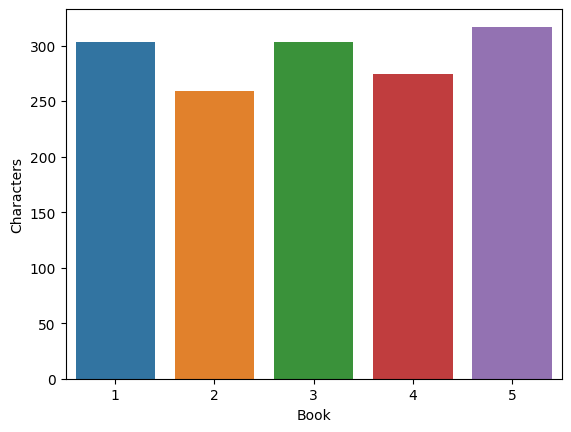

In [78]:
sns.barplot(data= df_characters, x= 'Book',y='Characters')

## Top 3

In [87]:
ls_top = []
for i in range(5):
    top =sorted(ls_metrics[i].items(), key=lambda x: x[1], reverse = True)[:3]
    for character in top:
        ls_top.append(character[0])
ls_top = list(set(ls_top))

In [88]:
ls_top

['Tyrion-Lannister',
 'Catelyn-Stark',
 'Daenerys-Targaryen',
 'Brienne-of-Tarth',
 'Theon-Greyjoy',
 'Eddard-Stark',
 'Robb-Stark',
 'Stannis-Baratheon',
 'Cersei-Lannister',
 'Arya-Stark',
 'Jaime-Lannister',
 'Jon-Snow']

## Timeline of importance

In [91]:
ls_new= ['Drogo', 'Missandei', 'Margaery-Tyrell', 'Margaery-Tyrell', 'Sansa-Stark']
for new_character in ls_new:
    ls_top.append(new_character)

In [108]:
dc_relevance= dict()
dc_relevance["Character"] = ls_top
for i in range(5):
    aux= []
    for character in ls_top:
        if(character in ls_metrics[i].keys()):
            aux.append(ls_metrics[i][character])
        else:
            aux.append(0)
    book= 'Book ' + str(i+1)
    dc_relevance[book] = aux

In [122]:
df_relevance= pd.DataFrame(dc_relevance).set_index("Character").T

In [123]:
df_relevance

Character,Tyrion-Lannister,Catelyn-Stark,Daenerys-Targaryen,Brienne-of-Tarth,Theon-Greyjoy,Eddard-Stark,Robb-Stark,Stannis-Baratheon,Cersei-Lannister,Arya-Stark,Jaime-Lannister,Jon-Snow,Drogo,Missandei,Margaery-Tyrell,Margaery-Tyrell,Sansa-Stark
Book 1,0.033014,0.030190,0.014702,0.000000,0.009430,0.045502,0.021559,0.006933,0.017075,0.015630,0.017501,0.026841,0.014578,0.000000,0.000000,0.000000,0.019998
Book 2,0.028067,0.018221,0.015477,0.006163,0.023451,0.011278,0.019789,0.020482,0.019898,0.022291,0.010565,0.018773,0.003429,0.000000,0.002747,0.002747,0.013272
Book 3,0.023820,0.017224,0.015272,0.005978,0.002052,0.006509,0.023134,0.013311,0.014009,0.014897,0.018872,0.023599,0.002679,0.002616,0.004400,0.004400,0.020105
Book 4,0.014278,0.006558,0.000000,0.018724,0.003055,0.004553,0.005092,0.011210,0.034467,0.017524,0.041517,0.007734,0.000000,0.000000,0.013402,0.013402,0.014124
Book 5,0.018516,0.000972,0.032758,0.001686,0.020106,0.008220,0.006260,0.027986,0.016979,0.007487,0.008214,0.037934,0.001468,0.003898,0.000989,0.000989,0.002023


[Text(0, 0.5, 'Importance'), Text(0.5, 1.0, 'Importance of characters')]

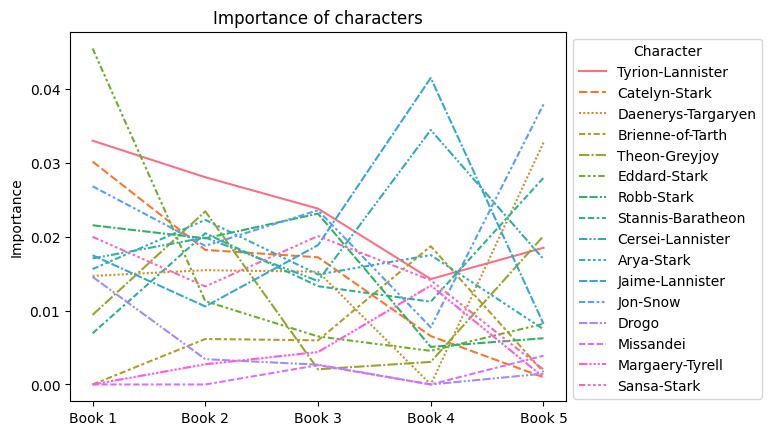

In [130]:
ax=sns.lineplot(data= df_relevance)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1,1))
ax.set(ylabel= "Importance", title="Importance of characters" )

In [137]:
px.line(data_frame=df_relevance)

ValueError: The truth value of a DataFrame is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().